In [8]:
from BCBio import GFF
from BCBio.GFF import GFFExaminer
examiner = GFFExaminer()

from Bio import SeqIO
from pprint import pprint
import copy 
import gspread
import os
import pandas as pd
import subprocess
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Variables the user must set to run the analysis.

`data_dir` folder into which reference files should be loaded prior to analysis,
expected structure

```bash
{data_dir}
├── references
│   ├── GorGor
│   │   └── ...  # https://www.ncbi.nlm.nih.gov/datasets/genome/GCF_029281585.1/
│   ├── HomSap
│   │   └── ...  # https://www.ncbi.nlm.nih.gov/datasets/genome/GCF_009914755.1/
│   ├── PanPan
│   │   └── ...  # https://www.ncbi.nlm.nih.gov/datasets/genome/GCF_029289425.1/
│   ├── PanTro
│   │   └── ...  # https://www.ncbi.nlm.nih.gov/datasets/genome/GCF_028858775.1/
│   ├── PonAbe
│   │   └── ...  # https://www.ncbi.nlm.nih.gov/datasets/genome/GCF_028885655.1/
│   ├── PonPyg
│   │   └── ...  # https://www.ncbi.nlm.nih.gov/datasets/genome/GCF_028885625.1/
│   └── SymSyn
│       └── ...  # https://www.ncbi.nlm.nih.gov/datasets/genome/GCF_028878055.1/
├── work_dir
│       └── ...
└── AdditionalFile2-SeqClasses.tsv # Download sequence classes file from additional data files
```

In [5]:
# data_dir = "/Users/kxp5629/proj/Y/data"

In [12]:
work_dir = f"{data_dir}/work_dir/x_multicopy"
os.makedirs(work_dir, exist_ok=True)

data = [
    {'species':'PanPan',
     'data': {'chr_y': "NC_073273.1",
              'chr_x': "NC_073272.1",
              'path_to_annotation_NCBI': f"{data_dir}/references/PanPan/ncbi_dataset/data/GCF_029289425.1/genomic.gff",
              'path_to_annotation_NCBI_chry': f"{data_dir}/references/PanPan/ncbi_dataset/data/GCF_029289425.1/genomic_chrY.gff",
              'path_to_annotation_CAT': f"{data_dir}/CAT/consensus_gene_set/GCF_029289425.1.gff3",
              'ref': f"{data_dir}/references/PanPan/ncbi_dataset/data/GCF_029289425.1/GCF_029289425.1_NHGRI_mPanPan1-v1.1-0.1.freeze_pri_genomic.fna",
              'cds': f'{data_dir}/references/PanPan/ncbi_dataset/data/GCF_029289425.1/cds_from_genomic.fna',
              'prot': f'{data_dir}/references/PanPan/ncbi_dataset/data/GCF_029289425.1/protein.faa',
              }},
    {'species':'PanTro',
     'data': {'chr_y': "NC_072422.1",
              'chr_x': "NC_072421.1",
              'path_to_annotation_NCBI': f"{data_dir}/references/PanTro/ncbi_dataset/data/GCF_028858775.1/genomic.gff",
              'path_to_annotation_NCBI_chry': f"{data_dir}/references/PanTro/ncbi_dataset/data/GCF_028858775.1/genomic_chrY.gff",
              'path_to_annotation_CAT': f"{data_dir}/CAT/consensus_gene_set/GCF_028858775.1.gff3",
              'ref':  f"{data_dir}/references/PanTro/ncbi_dataset/data/GCF_028858775.1/GCF_028858775.1_NHGRI_mPanTro3-v1.1-hic.freeze_pri_genomic.fna",
              'rna':  f"{data_dir}/references/PanTro/ncbi_dataset/data/GCF_028858775.1/rna.fna",
              'prot': f"{data_dir}/references/PanTro/ncbi_dataset/data/GCF_028858775.1/protein.faa",
              'cds': f"{data_dir}/references/PanTro/ncbi_dataset/data/GCF_028858775.1/cds_from_genomic.fna",
              'prot':  f"{data_dir}/references/PanTro/ncbi_dataset/data/GCF_028858775.1/protein.faa",
              
              }},
    {'species':'HomSap',
     'data': {'chr_y': "NC_060948.1",
              'chr_x': "NC_060947.1",
              'path_to_annotation_NCBI': f"{data_dir}/references/HomSap/ncbi_dataset/data/GCF_009914755.1/genomic.gff",
              'path_to_annotation_NCBI_chry': f"{data_dir}/references/HomSap/ncbi_dataset/data/GCF_009914755.1/genomic_chrY.gff",
              'path_to_annotation_CAT': f"{data_dir}/CAT/consensus_gene_set/hg38.gff3",
              'ref': f"{data_dir}/references/HomSap/ncbi_dataset/data/GCF_009914755.1/GCF_009914755.1_T2T-CHM13v2.0_genomic.fna",
              'cds': f"{data_dir}/references/HomSap/ncbi_dataset/data/GCF_009914755.1/cds_from_genomic.fna",
              'prot': f"{data_dir}/references/HomSap/ncbi_dataset/data/GCF_009914755.1/protein.faa",
              }},
    {'species':'GorGor',
     'data': {'chr_y': "NC_073248.1",
              'chr_x': "NC_073247.1",
              'path_to_annotation_NCBI': f"{data_dir}/references/GorGor/ncbi_dataset/data/GCF_029281585.1/genomic.gff",
              'path_to_annotation_NCBI_chry': f"{data_dir}/references/GorGor/ncbi_dataset/data/GCF_029281585.1/genomic_chrY.gff",
              'path_to_annotation_CAT': f"{data_dir}/CAT/consensus_gene_set/GCF_029281585.1.gff3",
              'ref': f'{data_dir}/references/GorGor/ncbi_dataset/data/GCF_029281585.1/GCF_029281585.1_NHGRI_mGorGor1-v1.1-0.2.freeze_pri_genomic.fna',
              'cds': f'{data_dir}/references/GorGor/ncbi_dataset/data/GCF_029281585.1/cds_from_genomic.fna',
              'prot': f'{data_dir}/references/GorGor/ncbi_dataset/data/GCF_029281585.1/protein.faa',
              }},
    {'species':'PonPyg',
     'data': {'chr_y': "NC_072397.1",
              'chr_x': "NC_072396.1",
              'path_to_annotation_NCBI': f"{data_dir}/references/PonPyg/ncbi_dataset/data/GCF_028885625.1/genomic.gff",
              'path_to_annotation_NCBI_chry': f"{data_dir}/references/PonPyg/ncbi_dataset/data/GCF_028885625.1/genomic_chrY.gff",
              'path_to_annotation_CAT': f"{data_dir}/CAT/consensus_gene_set/GCF_028885625.1.gff3",
              'ref': f'{data_dir}/references/PonPyg/ncbi_dataset/data/GCF_028885625.1/GCF_028885625.1_NHGRI_mPonPyg2-v1.1-hic.freeze_pri_genomic.fna',
              'cds': f'{data_dir}/references/PonPyg/ncbi_dataset/data/GCF_028885625.1/cds_from_genomic.fna',
              'prot': f'{data_dir}/references/PonPyg/ncbi_dataset/data/GCF_028885625.1/protein.faa',
              }},
    {'species':'PonAbe',
     'data': {'chr_y': "NC_072009.1",
              'chr_x': "NC_072008.1",
              'path_to_annotation_NCBI': f"{data_dir}/references/PonAbe/ncbi_dataset/data/GCF_028885655.1/genomic.gff",
              'path_to_annotation_NCBI_chry': f"{data_dir}/references/PonAbe/ncbi_dataset/data/GCF_028885655.1/genomic_chrY.gff",
              'path_to_annotation_CAT': f"{data_dir}/CAT/consensus_gene_set/GCF_028885655.1.gff3",
              'ref': f'{data_dir}/references/PonAbe/ncbi_dataset/data/GCF_028885655.1/GCF_028885655.1_NHGRI_mPonAbe1-v1.1-hic.freeze_pri_genomic.fna',
              'cds': f'{data_dir}/references/PonAbe/ncbi_dataset/data/GCF_028885655.1/cds_from_genomic.fna',
              'prot': f'{data_dir}/references/PonAbe/ncbi_dataset/data/GCF_028885655.1/protein.faa',
              }},    
    {'species':'SymSyn',
      'data': {'chr_y': "NC_072448.1",
               'chr_x': "NC_072447.1",
               'ref': f'{data_dir}/references/SymSyn/ncbi_dataset/data/GCF_028878055.1/GCF_028878055.1_NHGRI_mSymSyn1-v1.1-hic.freeze_pri_genomic.fna',
               'path_to_annotation_NCBI': f"{data_dir}/references/SymSyn/ncbi_dataset/data/GCF_028878055.1/genomic.gff",
               'path_to_annotation_NCBI_chry': f"{data_dir}/references/SymSyn/ncbi_dataset/data/GCF_028878055.1/genomic_chrY.gff",
               'path_to_annotation_CAT': f"{data_dir}/CAT/consensus_gene_set/GCF_028878055.1.gff3",
               'cds': f'{data_dir}/references/SymSyn/ncbi_dataset/data/GCF_028878055.1/cds_from_genomic.fna',
               'prot': f'{data_dir}/references/SymSyn/ncbi_dataset/data/GCF_028878055.1/protein.faa',
               }},
]

species_to_sequence_spec = {
    'PanPan': 'bonobo',
    'PanTro': 'chimpanzee',
    'HomSap': 'human',
    'GorGor': 'gorilla',
    'PonPyg': 'b-orang',
    'PonAbe': 's-orang',
    'SymSyn': 'siamang'
}

species_list = [d['species'] for d in data]

In [10]:
#subset annotation file to only include chromosome X
for species in species_list:

    annotation_file =  [d for d in data if d['species'] == species][0]['data']['path_to_annotation_NCBI']
    annotation_file_x = annotation_file.replace(".gff", "_chrX.gff")
    chr = [d for d in data if d['species'] == species][0]['data']['chr_x']
    print(species, annotation_file, chr)

    ! cat $annotation_file | grep -v "#" | grep -w $chr | sort -k1,1V -k4,4n -k5,5rn -k3,3r - > $annotation_file_x

    annotation_file_y = annotation_file.replace(".gff", "_chrY.gff")
    chr = [d for d in data if d['species'] == species][0]['data']['chr_y']
    print(species, annotation_file, chr)

    ! cat $annotation_file | grep -v "#" | grep -w $chr | sort -k1,1V -k4,4n -k5,5rn -k3,3r - > $annotation_file_y

PanPan /Users/kxp5629/proj/Y/data/references/PanPan/ncbi_dataset/data/GCF_029289425.1/genomic.gff NC_073272.1
PanPan /Users/kxp5629/proj/Y/data/references/PanPan/ncbi_dataset/data/GCF_029289425.1/genomic.gff NC_073273.1
PanTro /Users/kxp5629/proj/Y/data/references/PanTro/ncbi_dataset/data/GCF_028858775.1/genomic.gff NC_072421.1
PanTro /Users/kxp5629/proj/Y/data/references/PanTro/ncbi_dataset/data/GCF_028858775.1/genomic.gff NC_072422.1
HomSap /Users/kxp5629/proj/Y/data/references/HomSap/ncbi_dataset/data/GCF_009914755.1/genomic.gff NC_060947.1
HomSap /Users/kxp5629/proj/Y/data/references/HomSap/ncbi_dataset/data/GCF_009914755.1/genomic.gff NC_060948.1
GorGor /Users/kxp5629/proj/Y/data/references/GorGor/ncbi_dataset/data/GCF_029281585.1/genomic.gff NC_073247.1
GorGor /Users/kxp5629/proj/Y/data/references/GorGor/ncbi_dataset/data/GCF_029281585.1/genomic.gff NC_073248.1
PonPyg /Users/kxp5629/proj/Y/data/references/PonPyg/ncbi_dataset/data/GCF_028885625.1/genomic.gff NC_072396.1
PonPyg /Us

## Chromosome X

In [11]:
#runs around 20s without extracting the sequence
#runs around 1m with extracting the sequence
#only collect ID's will extract sequence from cds_from_genomic.fna
record_dict = {}

for species in species_list:


    annotation_file =  [d for d in data if d['species'] == species][0]['data']['path_to_annotation_NCBI'].replace(".gff", "_chrX.gff")
    handle = open(annotation_file)

    # pprint.pprint(examiner.parent_child_map(handle))

    # assert False

    # records = GFF.parse(handle,base_dict=seq_dict)
    records = GFF.parse(handle)
    for rec in records:
        protss = set()
        for feature in rec.features:
            if feature.type != "gene":
                continue
            if "description" in feature.qualifiers:
                description = feature.qualifiers["description"][0]

                gene_id = feature.id.replace("gene-", "")
                gene_spec_id = gene_id + "_" + species
                    
                # print(feature.qualifiers)
                for subf in feature.sub_features:

                    if subf.type == "mRNA":
                        mrna_id = subf.id.replace("rna-", "")
                        for subsubf in subf.sub_features:
                            if subsubf.type != "CDS":
                                continue
                            # cds_id = subsubf.id.replace("cds-", "")
                            prot_id = subsubf.qualifiers["protein_id"][0]
                            if prot_id in protss:
                                continue

                            protss.add(prot_id)
                            element = {}
                            element["specie"] = species
                            element["name"] = description
                            element["id"] = prot_id
                            element["mrna_id"] = mrna_id
                            element["gene_id"] = gene_id
                            element["start"] = int(subsubf.location.start)
                            element["end"] = int(subsubf.location.end)
                            element["gene_spec_id"] = gene_spec_id

                            # element["seq"] = str(subf.extract(rec.seq))
                            if gene_id in record_dict:
                                record_dict[gene_id].append(element)
                            else:
                                record_dict[gene_id] = [element]

    handle.close()

pprint(record_dict)

{'ABCB7': [{'end': 74738407,
            'gene_id': 'ABCB7',
            'gene_spec_id': 'ABCB7_PanPan',
            'id': 'XP_003824443.1',
            'mrna_id': 'XM_003824395.4',
            'name': 'ATP binding cassette subfamily B member 7',
            'specie': 'PanPan',
            'start': 74738191},
           {'end': 74738407,
            'gene_id': 'ABCB7',
            'gene_spec_id': 'ABCB7_PanPan',
            'id': 'XP_008976360.1',
            'mrna_id': 'XM_008978112.3',
            'name': 'ATP binding cassette subfamily B member 7',
            'specie': 'PanPan',
            'start': 74738191},
           {'end': 74738407,
            'gene_id': 'ABCB7',
            'gene_spec_id': 'ABCB7_PanPan',
            'id': 'XP_054962230.1',
            'mrna_id': 'XM_055106255.1',
            'name': 'ATP binding cassette subfamily B member 7',
            'specie': 'PanPan',
            'start': 74738191},
           {'end': 72876947,
            'gene_id': 'ABCB7',
      

In [24]:
#read sequence classes for all species
seq_class_dicts = {}
for species in species_list:

    sequence_class_file = f"{data_dir}/AdditionalFile2-SeqClasses.tsv"
    seq_class_dicts[species] = []
    with open(sequence_class_file) as f:
        for line in f:
            line = line.strip().split("\t")
            if line[0] == species_to_sequence_spec[species]:
                if line[2] == "chrX":
                    seq_class_dicts[species].append(line[2:])

In [27]:
prot_dicts = {}

for species in species_list:

    sequence_file = [d for d in data if d['species'] == species][0]['data']['prot']
    sequence_handle = open(sequence_file)
    seq_dict = SeqIO.to_dict(SeqIO.parse(sequence_handle, "fasta"))

    prot_dicts[species] = seq_dict

    sequence_handle.close()
   

In [28]:
#collect sequence for each gene
for record in record_dict:
    
    for element in record_dict[record]:
        species = element["specie"]
        id = element["id"]
        name = element["name"]
        # for prot in prot_dicts[specie]:
        #     print(prot)
        #     print(prot_dicts[specie][prot])
        #     assert False
        prot_sequences = [prot_dicts[species][x] for x in prot_dicts[species] if (id in x )]
        if len(prot_sequences) == 0:
            print("No sequence found")
            print(id)
            assert False
        seq = str(prot_sequences[0].seq)
        if len(seq) > 1:
            for prot in prot_sequences:
                if len(prot.seq) > len(seq):
                    seq = str(prot.seq)

        element["seq"] = seq


In [29]:
#reduce list of prot sequences to longest sequence per gene
gene_record_dict = {}
for record in record_dict:
    gene_spec_ids = set()
    gene_spec_elements = []
    
    for element in record_dict[record]:
        # gene_id = element["gene_id"]
        gene_spec_id = element["gene_spec_id"]
        
        if gene_spec_id not in gene_spec_ids:
            gene_spec_elements.append(element)
        else:
            if len(element["seq"]) > len([x for x in gene_spec_elements if x["gene_spec_id"] == gene_spec_id][0]["seq"]):
                for el in gene_spec_elements:
                    if el["gene_spec_id"] == gene_spec_id:
                        el["seq"] = element["seq"]
                        break

        gene_spec_ids.add(element["gene_spec_id"])
    
    gene_record_dict[record] = gene_spec_elements

# pprint(gene_record_dict)

In [30]:
#print one protein file per specie
cmd = f"mkdir -p {work_dir}/protein_extracted_longest"
subprocess.run(cmd, shell=True)
for species in species_list:
    file = f"{work_dir}/protein_extracted_longest/{species}.faa"


    species_records = {}
    for gene in gene_record_dict:
        species_records[gene] = []
        for element in gene_record_dict[gene]:
            if element["specie"] == species:
                species_records[gene].append(element)


    with open(file, "w") as outfile:
        for entry in species_records:
            element = species_records[entry]
            if len(element) > 1:
                print(species)
                assert False
            if len(element) == 0:
                continue
            element = element[0]
            outfile.write(f">{element['id']} gene:{element['gene_id']} mrna:{element['mrna_id']} {element['specie']} {element['name']}\n")
            outfile.write(f"{element['seq']}\n")

In [ ]:
#make blast db
cmd = f"mkdir -p {work_dir}/protein_extracted_longest/blastdb"
subprocess.run(cmd, shell=True, check=True)
#concat all fasta files
cmd = f"cat {work_dir}/protein_extracted_longest/*.faa \
    > {work_dir}/protein_extracted_longest/blastdb/all_proteins.faa"
# run command
subprocess.run(cmd, shell=True, check=True)

In [ ]:
#make blast db
cmd = f"makeblastdb -in {work_dir}/protein_extracted_longest/blastdb/all_proteins.faa \
     -dbtype prot\
     -out {work_dir}/protein_extracted_longest/blastdb/all_proteins"

subprocess.run(cmd, shell=True, check=True)

In [ ]:
# blast all against DB
for s in species_list:
    cmd = f"blastp -query {work_dir}/protein_extracted_longest/{s}.faa \
    -db {work_dir}/protein_extracted_longest/blastdb/all_proteins \
    -out {work_dir}/protein_extracted_longest/{s}.blastp.tsv \
    -outfmt \"6 qseqid sseqid pident mismatch gapopen gaps qcovs qcovshsp evalue\" "
    subprocess.run(cmd, shell=True, check=True)

In [31]:
#collect edges for each protein
edges = {}
identity = 50
coverage = 35
score = 0.001 #this is too high at the moment

for s in species_list:
    file = f"{work_dir}/protein_extracted_longest/{s}.blastp.tsv"
    with open(file, "r") as infile:
        for line in infile:
            line = line.strip().split("\t")
            if float(line[2]) >= identity and int(line[6]) >= coverage and float(line[7]) < score:
                if line[0] in edges:
                    edges[line[0]].append(line[1])
                else:
                    edges[line[0]] = [line[1]]

In [33]:
#only keep two way edges
edges_2way = []
vertices = set()
for node_A in edges:
    for node_B in edges[node_A]:
        if node_B in edges and node_A in edges[node_B]:
            tuple = (node_A, node_B)
            tuple = sorted(tuple)

            if tuple in edges_2way:
                continue

            edges_2way.append(tuple)
            vertices.add(node_A)
            vertices.add(node_B)     

In [34]:
#create clusters with transitive clusering
clusters = []
for edge in edges_2way:
    found = False
    for cluster in clusters:
        if edge[0] in cluster or edge[1] in cluster:
            cluster.add(edge[0])
            cluster.add(edge[1])
            found = True
            break
    if not found:
        clusters.append(set(edge))


#merge clusters with common elements
merged_clusters = []
for cluster in clusters:
    found = False
    for merged_cluster in merged_clusters:
        if len(cluster.intersection(merged_cluster)) > 0:
            merged_cluster.update(cluster)
            found = True
            break
    if not found:
        merged_clusters.append(cluster)

In [35]:
prot_to_species = {}

for cluster in merged_clusters:

    for prot in cluster:
        # print(prot)
        species = ""
        for gene in gene_record_dict:
            for element in gene_record_dict[gene]:
                if element["id"] == prot:
                    species = element["specie"]
                    prot_to_species[prot] = species
                        

In [36]:
#read blast results into pandas dataframe
# columns :species, gene_A, gene_B, identity, coverage, evalue



data_frames = {}
for species in species_list:
    blast_results = pd.DataFrame(columns=["gene_A", "gene_B", "identity", "coverage", "evalue"]) 
    blast_results_list = []
    file = f"{work_dir}/protein_extracted_longest/{species}.blastp.tsv"
    with open(file, "r") as infile:
        for line in infile:
            line = line.strip().split("\t")
            # if float(line[2]) >= identity and int(line[6]) >= coverage and float(line[7]) < score:
            blast_results_list.append({"species": species, "gene_A": line[0], "gene_B": line[1], "identity": line[2], "coverage": line[6], "evalue": line[7]})

    blast_results = pd.DataFrame(blast_results_list)
    data_frames[species] = blast_results

In [41]:
palindrome_locations_file_path = "./data/PalindromeLocations.tsv" #this file is distributed along the code
species_trans = {
    "HomSap_x": "chm13"    ,
    "HomSap_y": "hg002"    ,
    "GorGor": "mGorGor1" ,
    "PanTro": "mPanTro3" ,
    "PanPan": "mPanPan1" ,
    "PonAbe": "mPonAbe1" ,
    "PonPyg": "mPonPyg2" ,
    "SymSyn": "mSymSyn1" 
}
palindrome_locations_file = open(palindrome_locations_file_path, "r")
palindrome_locations = palindrome_locations_file.readlines()
palindrome_locations_file.close()
chr = "x"

palindrome_lines_per_species = {}

for species in species_list:
    palindrome_lines = []
    for row in palindrome_locations:
        row = row.strip().split("\t")
        if len(row) < 4:
            continue
        if row[1] != '' and row[1] != 'start':
                    
            if species == "HomSap":
                sp = f"{species}_{chr}"
                species_chr = f"{species_trans[sp]}.chr{chr.upper()}"
            else:
                species_chr = f"{species_trans[species]}.chr{chr.upper()}"

            if row[0] == species_chr:
                palindrome_lines.append([x.replace(',','') for x in row])
    palindrome_lines_per_species[species] = palindrome_lines

In [44]:
cmd = f"mkdir -p {work_dir}/protein_extracted_longest/clusters_merged"
subprocess.run(cmd, shell=True, check=True)

file = open(f"{work_dir}/protein_extracted_longest/clusters_merged/clusters.tsv", "w")
file_identities = open(f"{work_dir}/protein_extracted_longest/clusters_merged/clusters_identities.tsv", "w")
file_classes = open(f"{work_dir}/protein_extracted_longest/clusters_merged/clusters_classes.tsv", "w")

header = "id\tgene_symbol\tDescription(s)"
for species in species_list:
    header += f"\t{species}"

print(header, file=file)
print(header, file=file_identities)
print(header, file=file_classes)

counter = 0
prot_to_cluster = {}
list_of_all_identities = []
for cluster in merged_clusters:

    cluster_copy = copy.deepcopy(cluster)
    counter += 1
    species_count = {}
    gene_names = set()
    gene_symbol = ""
    report = False
    gene_identity_counter_per_species = {}

    classes_per_species = {}
    for species in species_list:
        classes_per_species[species] = {
                "par_counter" : 0,
                "ampl_counter" : 0,
                "ancestral_counter" : 0,
                "palindrome_counter" : 0
        }
    

    cluster_fasta_file = f"{work_dir}/protein_extracted_longest/clusters_merged/cluster_{counter}.faa"
    with open(cluster_fasta_file, "w") as cluster_outfile:
        for prot in cluster:
            # print(prot)
            species = ""
            desc = ""
            for gene in gene_record_dict:
                for element in gene_record_dict[gene]:
                    if element["id"] == prot:
                        gene_names.add(element["name"])
                        species = element["specie"]
                        # print(element)
                        desc = element["name"]
                        report_gene = gene

                        prot_to_cluster[prot] = counter
                        
                        if species in species_count:
                            report = True
                            # species = element
                            species_count[species] += 1
                        else:
                            species_count[species] = 1
                        sequence = element["seq"]

                        el_start =  element["start"]
                        el_end =  element["end"]

                        for seq_class in seq_class_dicts[species]:
                            class_name = seq_class[3]
                            if el_start >= int(seq_class[1]) and el_end <= int(seq_class[2]):

                                if seq_class[3] == "PAR":
                                    classes_per_species[species]["par_counter"] += 1
                                elif seq_class[3] == "AMPLICONIC":
                                    classes_per_species[species]["ampl_counter"] += 1
                                elif seq_class[3] == "ANCESTRAL" :
                                    classes_per_species[species]["ancestral_counter"] += 1
                                break
                            else:
                                #TODO if more than 50% of the sequence is in the class, count it as in the class
                                
                                if el_start < int(seq_class[1]) and el_end > int(seq_class[1]):
                                    if int(seq_class[1]) - el_start > 0.5 * len(sequence):
                                        if seq_class[3] == "PAR":
                                            classes_per_species[species]["par_counter"] += 1
                                        elif seq_class[3] == "AMPLICONIC":
                                            classes_per_species[species]["ampl_counter"] += 1
                                        elif seq_class[3] == "ANCESTRAL":
                                            classes_per_species[species]["ancestral_counter"] += 1
                                        break
                                if el_start < int(seq_class[2]) and el_end > int(seq_class[2]):
                                    if el_end - int(seq_class[2]) > 0.5 * len(sequence):
                                        if seq_class[3] == "PAR":
                                            classes_per_species[species]["par_counter"] += 1
                                        elif seq_class[3] == "AMPLICONIC":
                                            classes_per_species[species]["ampl_counter"] += 1
                                        elif seq_class[3] == "ANCESTRAL":
                                            classes_per_species[species]["ancestral_counter"] += 1
                                        break


                        for palindrome in palindrome_lines_per_species[species]:
                            if el_start >= int(palindrome[1]) and el_end <= int(palindrome[2]):
                                if counter == 21:
                                    print(palindrome)
                                classes_per_species[species]["palindrome_counter"] += 1
                                break
                            else:
                                if el_start < int(palindrome[1]) and el_end > int(palindrome[2]):
                                    
                                    print(f"start: {el_start} end: {el_end} palindrome: {palindrome[0]} start: {palindrome[1]} end: {palindrome[2]}")
                                    assert False
                                if el_start < int(palindrome[1]) and el_end > int(palindrome[2]):
                                    print(f"start: {el_start} end: {el_end} palindrome: {palindrome[0]} start: {palindrome[1]} end: {palindrome[2]}")
                                    assert False

                        if element["specie"] == "HomSap":
                            if gene.startswith("LOC"):
                                continue
                            gene_symbol = gene
                        break
            
            print(f">{prot}_gene:{report_gene}_species:{species} description:{desc}\n{sequence}", file=cluster_outfile)   
            for prot_B in cluster_copy:
                if prot == prot_B:
                    continue
                species = prot_to_species[prot]
                if species != prot_to_species[prot_B]:
                    continue
                # blast results initiated in later cells, TODO: move to top
                blast_results = data_frames[species]
                blast_result = blast_results[(blast_results["gene_A"] == prot) & (blast_results["gene_B"] == prot_B)]
                if blast_result.empty:
                    continue

                identity1 = blast_result.iloc[0]["identity"]

                blast_result = blast_results[(blast_results["gene_A"] == prot_B) & (blast_results["gene_B"] == prot)]
                if blast_result.empty:
                    continue
                identity2 = blast_result.iloc[0]["identity"]

                if identity2 < identity1:
                    identity1 = identity2
                if species not in gene_identity_counter_per_species:
                    gene_identity_counter_per_species[species] = f"{identity1}"
                else:
                    gene_identity_counter_per_species[species] += f";{identity1}"
                list_of_all_identities.append(float(identity1))
            cluster_copy.remove(prot)
                
    if report:
        
        if gene_symbol == "":
            gene_symbol = list(gene_names)[0]
        line = f"{counter}\t{gene_symbol}\t{';'.join(gene_names)}"
        for species in species_list:
            if species not in species_count:
                species_count[species] = 0
            line += f"\t{species_count[species]}"

        print(line, file=file)

        identity_line = f"{counter}\t{gene_symbol}\t{';'.join(gene_names)}"
        for species in species_list:
            if species not in gene_identity_counter_per_species:
                gene_identity_counter_per_species[species] = 0
            identity_line += f"\t{gene_identity_counter_per_species[species]}"
        print(identity_line, file=file_identities)

        class_line = f"{counter}\t{gene_symbol}\t{';'.join(gene_names)}"
        
        per_line_class_counter = {
            "par_counter" : 0 ,
            "ampl_counter" : 0,
            "ancestral_counter" : 0,
            "palindrome_counter" : 0
        }
        for species in species_list:
            par_counter = classes_per_species[species]["par_counter"]
            per_line_class_counter["par_counter"] += par_counter
            ampl_counter = classes_per_species[species]["ampl_counter"]
            per_line_class_counter["ampl_counter"] += ampl_counter
            ancestral_counter = classes_per_species[species]["ancestral_counter"]
            per_line_class_counter["ancestral_counter"] += ancestral_counter
            palindrome_counter = classes_per_species[species]["palindrome_counter"]
            per_line_class_counter["palindrome_counter"] += palindrome_counter
            class_line += f"\t{ampl_counter} ({palindrome_counter}) + {ancestral_counter} + {par_counter}"


        class_line += f"\t{per_line_class_counter['ampl_counter']} ({per_line_class_counter['palindrome_counter']}) + {per_line_class_counter['ancestral_counter']} + {per_line_class_counter['par_counter']}"
        print(class_line, file=file_classes)
     
file.close()
file_identities.close()
file_classes.close()

['mGorGor1.chrX', '12558708', '12569123', '10415', 'Q2.1B']
['mSymSyn1.chrX', '65820314', '65882750', '62436', 'Q10A']
['chm13.chrX', '139312784 ', '139326988', '14204', 'Q19.1A']
['mPanPan1.chrX', '54033152', '54138550', '105398', 'Q7A']
['mPonAbe1.chrX', '52937552', '52949444', '11892', 'Q5.2B']
['mPonAbe1.chrX', '52949428', '52982434', '33006', 'Q5.1B']
['mGorGor1.chrX', '12357752', '12368157', '10405', 'Q2.1A']
['mSymSyn1.chrX', '65896916', '65959337', '62421', 'Q10B']
['mGorGor1.chrX', '153367962', '153382193', '14231', 'Q19.4B']
['mPonPyg2.chrX', '53223101', '53343364', '120263', 'Q5B']
['mPanTro3.chrX', '52680461', '52785875', '105414', 'Q6A']
['chm13.chrX', '139781327 ', '139897861', '116534', 'Q19.2B']
['mGorGor1.chrX', '153160033', '153266637', '106604', 'Q19.2B']
['mSymSyn1.chrX', '65820314', '65882750', '62436', 'Q10A']
['mPonAbe1.chrX', '52680177', '52713223', '33046', 'Q5.1A']
['mPanTro3.chrX', '52787277', '52892691', '105414', 'Q6B']
['chm13.chrX', '139897915 ', '1399105

## Y-Chromosome

In [45]:
#runs around 20s without extracting the sequence
#runs around 1m with extracting the sequence
#only collect ID's will extract sequence from cds_from_genomic.fna
record_dict = {}

for species in species_list:


    annotation_file =  [d for d in data if d['species'] == species][0]['data']['path_to_annotation_NCBI'].replace(".gff", "_chrY.gff")
    handle = open(annotation_file)

    # pprint.pprint(examiner.parent_child_map(handle))

    # assert False

    # records = GFF.parse(handle,base_dict=seq_dict)
    records = GFF.parse(handle)
    for rec in records:
        protss = set()
        for feature in rec.features:
            if feature.type != "gene":
                continue
            if "description" in feature.qualifiers:
                description = feature.qualifiers["description"][0]

                gene_id = feature.id.replace("gene-", "")
                gene_spec_id = gene_id + "_" + species
                    
                # print(feature.qualifiers)
                for subf in feature.sub_features:

                    if subf.type == "mRNA":
                        mrna_id = subf.id.replace("rna-", "")
                        for subsubf in subf.sub_features:
                            if subsubf.type != "CDS":
                                continue
                            # cds_id = subsubf.id.replace("cds-", "")
                            prot_id = subsubf.qualifiers["protein_id"][0]
                            if prot_id in protss:
                                continue

                            protss.add(prot_id)
                            element = {}
                            element["specie"] = species
                            element["name"] = description
                            element["id"] = prot_id
                            element["mrna_id"] = mrna_id
                            element["gene_id"] = gene_id
                            element["start"] = int(subsubf.location.start)
                            element["end"] = int(subsubf.location.end)
                            element["gene_spec_id"] = gene_spec_id

                            # element["seq"] = str(subf.extract(rec.seq))
                            if gene_id in record_dict:
                                record_dict[gene_id].append(element)
                            else:
                                record_dict[gene_id] = [element]

    handle.close()

pprint(record_dict)

{'AKAP17A-2': [{'end': 1492830,
                'gene_id': 'AKAP17A-2',
                'gene_spec_id': 'AKAP17A-2_PanPan',
                'id': 'XP_054962985.1',
                'mrna_id': 'XM_055107010.2',
                'name': 'A-kinase anchoring protein 17A',
                'specie': 'PanPan',
                'start': 1492068},
               {'end': 1924154,
                'gene_id': 'AKAP17A-2',
                'gene_spec_id': 'AKAP17A-2_PanTro',
                'id': 'XP_016799280.2',
                'mrna_id': 'XM_016943791.3',
                'name': 'A-kinase anchoring protein 17A',
                'specie': 'PanTro',
                'start': 1923392},
               {'end': 1924154,
                'gene_id': 'AKAP17A-2',
                'gene_spec_id': 'AKAP17A-2_PanTro',
                'id': 'XP_016799281.2',
                'mrna_id': 'XM_016943792.3',
                'name': 'A-kinase anchoring protein 17A',
                'specie': 'PanTro',
                'star

In [46]:
#read sequence classes for all species
#read sequence classes for all species
seq_class_dicts = {}
for species in species_list:

    sequence_class_file = f"{data_dir}/AdditionalFile2-SeqClasses.tsv"
    seq_class_dicts[species] = []
    with open(sequence_class_file) as f:
        for line in f:
            line = line.strip().split("\t")
            if line[0] == species_to_sequence_spec[species]:
                if line[2] == "chrY":
                    seq_class_dicts[species].append(line[2:])

In [ ]:
pprint(seq_class_dicts)

In [47]:
# read the cds_from_genomic.fna file
prot_dicts = {}

for species in species_list:

    sequence_file = [d for d in data if d['species'] == species][0]['data']['prot']
    sequence_handle = open(sequence_file)
    seq_dict = SeqIO.to_dict(SeqIO.parse(sequence_handle, "fasta"))

    prot_dicts[species] = seq_dict

    sequence_handle.close()

In [48]:
for record in record_dict:
    
    for element in record_dict[record]:
        species = element["specie"]
        id = element["id"]
        name = element["name"]
        # for prot in prot_dicts[specie]:
        #     print(prot)
        #     print(prot_dicts[specie][prot])
        #     assert False
        prot_sequences = [prot_dicts[species][x] for x in prot_dicts[species] if (id in x )]
        if len(prot_sequences) == 0:
            print("No sequence found")
            print(id)
            assert False
        seq = str(prot_sequences[0].seq)
        if len(seq) > 1:
            for prot in prot_sequences:
                if len(prot.seq) > len(seq):
                    seq = str(prot.seq)

        element["seq"] = seq

In [49]:
#reduce list of prot sequences to longest sequence per gene
gene_record_dict = {}
for record in record_dict:
    gene_spec_ids = set()
    gene_spec_elements = []
    
    for element in record_dict[record]:
        # gene_id = element["gene_id"]
        gene_spec_id = element["gene_spec_id"]
        
        if gene_spec_id not in gene_spec_ids:
            gene_spec_elements.append(element)
        else:
            if len(element["seq"]) > len([x for x in gene_spec_elements if x["gene_spec_id"] == gene_spec_id][0]["seq"]):
                for el in gene_spec_elements:
                    if el["gene_spec_id"] == gene_spec_id:
                        el["seq"] = element["seq"]
                        break

        gene_spec_ids.add(element["gene_spec_id"])
    
    gene_record_dict[record] = gene_spec_elements

pprint(gene_record_dict)

{'AKAP17A-2': [{'end': 1492830,
                'gene_id': 'AKAP17A-2',
                'gene_spec_id': 'AKAP17A-2_PanPan',
                'id': 'XP_054962985.1',
                'mrna_id': 'XM_055107010.2',
                'name': 'A-kinase anchoring protein 17A',
                'seq': 'MAAATIVHDTSEAVELCPAYGLYLKPITKMTISVALPQLKQPGKSISNWEVMERLKGMVHNHQFSTLRISKSTMDFIRFEGEVENKSLVKSFLACLDGKTIKLSGFSDILKVRAAEFKIDFPTRHDWDSFFRDAKDMNETLPGERPDTIHLEGLPCKWFALKESGSEKPSEDVLVKVFEKFGEIRNVDIPMLDPYREEMTGRNFHTFSFGGHLNFEAYVQYREYVGFIQAMSALRGMKLMYKGEDGKAVACNIKVSFDSTKHLSDASIKKRQLERQKLQELEQQREEQKRREKEAEERQRAEERKQKELEELERERKREEKLRKREQKQRDRELRRNQKKLEKLQAEEQKQLQEKIKLEERKLLLAQRNLQSIRLIAELLSRAKAVKLREQEQKEEKLRLQQQEERRRLQEAELRRVEEEKERALGLQRKERELRERLLSILLSKKPDDGHAHDELGVAHADLLQPVLDILQTVSSGCVSATTLHPLGGQPPAGAPKESAAHPEADGAPKSVNGSVAEEAPCKEGQSSCRVAPEDGSPEKRCPGGVLSCIPDNNQQPKGIPACEQNVSKKDTRSEQDKCNREPSKGRGRATGDGLDDRHKRERSRARRAGSREDGRPRKERRPHKKHVYKDDSPRRRSTSPDHTRSRRSYSKDRHRRERSRERRGSASSKHSRHRRRSERWRSRSPSRHRSTWNR',
           

In [50]:
#print one protein file per specie
for species in species_list:
    file = f"{work_dir.replace('x_multicopy','y_multicopy')}/protein_extracted_longest/{species}.faa"


    species_records = {}
    for gene in gene_record_dict:
        species_records[gene] = []
        for element in gene_record_dict[gene]:
            if element["specie"] == species:
                species_records[gene].append(element)


    with open(file, "w") as outfile:
        for entry in species_records:
            element = species_records[entry]
            if len(element) > 1:
                print(species)
                assert False
            if len(element) == 0:
                continue
            element = element[0]
            outfile.write(f">{element['id']} gene:{element['gene_id']} mrna:{element['mrna_id']} {element['specie']} {element['name']}\n")
            outfile.write(f"{element['seq']}\n")

In [ ]:
#make blast db
cmd = f"mkdir -p {work_dir.replace('x_multicopy','y_multicopy')}/protein_extracted_longest/blastdb"
subprocess.run(cmd, shell=True, check=True)
#concat all fasta files
cmd = f"cat {work_dir.replace('x_multicopy','y_multicopy')}/protein_extracted_longest/*.faa \
    > {work_dir.replace('x_multicopy','y_multicopy')}/protein_extracted_longest/blastdb/all_proteins.faa"
# run command
subprocess.run(cmd, shell=True, check=True)

In [ ]:
#make blast db
cmd = f"makeblastdb -in {work_dir.replace('x_multicopy','y_multicopy')}/protein_extracted_longest/blastdb/all_proteins.faa \
     -dbtype prot\
     -out {work_dir.replace('x_multicopy','y_multicopy')}/protein_extracted_longest/blastdb/all_proteins"

subprocess.run(cmd, shell=True, check=True)

In [ ]:
# blast all against DB
for s in species_list:
    cmd = f"blastp -query {work_dir.replace('x_multicopy','y_multicopy')}/protein_extracted_longest/{s}.faa \
    -db {work_dir.replace('x_multicopy','y_multicopy')}/protein_extracted_longest/blastdb/all_proteins \
    -out {work_dir.replace('x_multicopy','y_multicopy')}/protein_extracted_longest/{s}.blastp.tsv \
    -outfmt \"6 qseqid sseqid pident mismatch gapopen gaps qcovs qcovshsp evalue\" "
    subprocess.run(cmd, shell=True, check=True)

In [51]:
#collect edges for each protein
edges = {}
identity = 50
coverage = 35
score = 0.001 #this is too high at the moment

for s in species_list:
    file = f"{work_dir.replace('x_multicopy','y_multicopy')}/protein_extracted_longest/{s}.blastp.tsv"
    with open(file, "r") as infile:
        for line in infile:
            line = line.strip().split("\t")
            if float(line[2]) >= identity and int(line[6]) >= coverage and float(line[7]) < score:
                if line[0] in edges:
                    edges[line[0]].append(line[1])
                else:
                    edges[line[0]] = [line[1]]


In [52]:
#only keep two way edges
edges_2way = []
vertices = set()
for node_A in edges:
    for node_B in edges[node_A]:
        if node_B in edges and node_A in edges[node_B]:
            tuple = (node_A, node_B)
            tuple = sorted(tuple)

            if tuple in edges_2way:
                continue

            edges_2way.append(tuple)
            vertices.add(node_A)
            vertices.add(node_B)        

In [53]:
#create clusters with transitive clusering
clusters = []
for edge in edges_2way:
    found = False
    for cluster in clusters:
        if edge[0] in cluster or edge[1] in cluster:
            cluster.add(edge[0])
            cluster.add(edge[1])
            found = True
            break
    if not found:
        clusters.append(set(edge))


#merge clusters with common elements
merged_clusters = []
for cluster in clusters:
    found = False
    for merged_cluster in merged_clusters:
        if len(cluster.intersection(merged_cluster)) > 0:
            merged_cluster.update(cluster)
            found = True
            break
    if not found:
        merged_clusters.append(cluster)

In [54]:
prot_to_species = {}

for cluster in merged_clusters:

    for prot in cluster:
        # print(prot)
        species = ""
        for gene in gene_record_dict:
            for element in gene_record_dict[gene]:
                if element["id"] == prot:
                    species = element["specie"]
                    prot_to_species[prot] = species
                        

In [55]:
#read blast results into pandas dataframe
# columns :species, gene_A, gene_B, identity, coverage, evalue



data_frames = {}
for species in species_list:
    blast_results = pd.DataFrame(columns=["gene_A", "gene_B", "identity", "coverage", "evalue"]) 
    blast_results_list = []
    file = f"{work_dir.replace('x_multicopy','y_multicopy')}/protein_extracted_longest/{species}.blastp.tsv"
    with open(file, "r") as infile:
        for line in infile:
            line = line.strip().split("\t")
            # if float(line[2]) >= identity and int(line[6]) >= coverage and float(line[7]) < score:
            blast_results_list.append({"species": species, "gene_A": line[0], "gene_B": line[1], "identity": line[2], "coverage": line[6], "evalue": line[7]})

    blast_results = pd.DataFrame(blast_results_list)
    data_frames[species] = blast_results

In [56]:
palindrome_locations_file_path = "./data/PalindromeLocations.tsv" #this file is distributed along the code
species_trans = {
    "HomSap_x": "chm13"    ,
    "HomSap_y": "hg002"    ,
    "GorGor": "mGorGor1" ,
    "PanTro": "mPanTro3" ,
    "PanPan": "mPanPan1" ,
    "PonAbe": "mPonAbe1" ,
    "PonPyg": "mPonPyg2" ,
    "SymSyn": "mSymSyn1" 
}
palindrome_locations_file = open(palindrome_locations_file_path, "r")
palindrome_locations = palindrome_locations_file.readlines()
palindrome_locations_file.close()
chr = "y"

palindrome_lines_per_species = {}

for species in species_list:
    palindrome_lines = []
    for row in palindrome_locations:
        row = row.strip().split("\t")
        if len(row) < 4:
            continue
        if row[1] != '' and row[1] != 'start':
                    
            if species == "HomSap":
                sp = f"{species}_{chr}"
                species_chr = f"{species_trans[sp]}.chr{chr.upper()}"
            else:
                species_chr = f"{species_trans[species]}.chr{chr.upper()}"

            if row[0] == species_chr:
                palindrome_lines.append([x.replace(',','') for x in row])
    palindrome_lines_per_species[species] = palindrome_lines


In [ ]:
pprint(palindrome_lines_per_species)

In [58]:
cmd = f"mkdir -p {work_dir.replace('x_multicopy','y_multicopy')}/protein_extracted_longest/clusters_merged"
subprocess.run(cmd, shell=True, check=True)

file = open(f"{work_dir.replace('x_multicopy','y_multicopy')}/protein_extracted_longest/clusters_merged/clusters.tsv", "w")
file_identities = open(f"{work_dir.replace('x_multicopy','y_multicopy')}/protein_extracted_longest/clusters_merged/clusters_identities.tsv", "w")
file_classes = open(f"{work_dir.replace('x_multicopy','y_multicopy')}/protein_extracted_longest/clusters_merged/clusters_classes.tsv", "w")

header = "id\tgene_symbol\tDescription(s)"
for species in species_list:
    header += f"\t{species}"

print(header, file=file)
print(header, file=file_identities)
print(header, file=file_classes)

counter = 0
prot_to_cluster = {}
list_of_all_identities = []
for cluster in merged_clusters:

    cluster_copy = copy.deepcopy(cluster)
    counter += 1
    species_count = {}
    gene_names = set()
    gene_symbol = ""
    report = False
    gene_identity_counter_per_species = {}

    classes_per_species = {}
    for species in species_list:
        classes_per_species[species] = {
                "par_counter" : 0,
                "ampl_counter" : 0,
                "ancestral_counter" : 0,
                "palindrome_counter" : 0
        }
    

    cluster_fasta_file = f"{work_dir.replace('x_multicopy','y_multicopy')}/protein_extracted_longest/clusters_merged/cluster_{counter}.faa"
    with open(cluster_fasta_file, "w") as cluster_outfile:
        for prot in cluster:
            # print(prot)
            species = ""
            desc = ""
            for gene in gene_record_dict:
                for element in gene_record_dict[gene]:
                    if element["id"] == prot:
                        gene_names.add(element["name"])
                        species = element["specie"]
                        # print(element)
                        desc = element["name"]
                        report_gene = gene

                        prot_to_cluster[prot] = counter
                        
                        if species in species_count:
                            report = True
                            # species = element
                            species_count[species] += 1
                        else:
                            species_count[species] = 1
                        sequence = element["seq"]

                        el_start =  element["start"]
                        el_end =  element["end"]

                        for seq_class in seq_class_dicts[species]:
                            class_name = seq_class[3]
                            if el_start >= int(seq_class[1]) and el_end <= int(seq_class[2]):

                                if seq_class[3] == "PAR":
                                    classes_per_species[species]["par_counter"] += 1
                                elif seq_class[3] == "AMPLICONIC":
                                    classes_per_species[species]["ampl_counter"] += 1
                                elif seq_class[3] == "ANCESTRAL":
                                    classes_per_species[species]["ancestral_counter"] += 1
                                break
                            else:
                                if el_start < int(seq_class[1]) and el_end > int(seq_class[1]):
                                    print(f"start: {el_start} end: {el_end} seq_class: {seq_class[0]} start: {seq_class[1]} end: {seq_class[2]}")
                                    assert False
                                if el_start < int(seq_class[2]) and el_end > int(seq_class[2]):
                                    print(f"start: {el_start} end: {el_end} seq_class: {seq_class[0]} start: {seq_class[1]} end: {seq_class[2]}")
                                    assert False


                        for palindrome in palindrome_lines_per_species[species]:
                            if el_start >= int(palindrome[1]) and el_end <= int(palindrome[2]):
                                classes_per_species[species]["palindrome_counter"] += 1
                                break
                            else:
                                if el_start < int(palindrome[1]) and el_end > int(palindrome[2]):

                                    print(f"start: {el_start} end: {el_end} palindrome: {palindrome[0]} start: {palindrome[1]} end: {palindrome[2]}")
                                    assert False
                                if el_start < int(palindrome[1]) and el_end > int(palindrome[2]):
                                    if counter == 245:
                                        print(palindrome)
                                    print(f"start: {el_start} end: {el_end} palindrome: {palindrome[0]} start: {palindrome[1]} end: {palindrome[2]}")
                                    assert False

                        if element["specie"] == "HomSap":
                            if gene.startswith("LOC"):
                                continue
                            gene_symbol = gene
                        break
            
            print(f">{prot}_gene:{report_gene}_species:{species} description:{desc}\n{sequence}", file=cluster_outfile)   
            for prot_B in cluster_copy:
                if prot == prot_B:
                    continue
                species = prot_to_species[prot]
                if species != prot_to_species[prot_B]:
                    continue
                # blast results initiated in later cells, TODO: move to top
                blast_results = data_frames[species]
                blast_result = blast_results[(blast_results["gene_A"] == prot) & (blast_results["gene_B"] == prot_B)]
                if blast_result.empty:
                    continue

                identity1 = blast_result.iloc[0]["identity"]

                blast_result = blast_results[(blast_results["gene_A"] == prot_B) & (blast_results["gene_B"] == prot)]
                if blast_result.empty:
                    continue
                identity2 = blast_result.iloc[0]["identity"]

                if identity2 < identity1:
                    identity1 = identity2
                if species not in gene_identity_counter_per_species:
                    gene_identity_counter_per_species[species] = f"{identity1}"
                else:
                    gene_identity_counter_per_species[species] += f";{identity1}"
                list_of_all_identities.append(float(identity1))
            cluster_copy.remove(prot)
                
    if report:
        
        if gene_symbol == "":
            gene_symbol = list(gene_names)[0]
        line = f"{counter}\t{gene_symbol}\t{';'.join(gene_names)}"
        for species in species_list:
            if species not in species_count:
                species_count[species] = 0
            line += f"\t{species_count[species]}"

        print(line, file=file)

        identity_line = f"{counter}\t{gene_symbol}\t{';'.join(gene_names)}"
        for species in species_list:
            if species not in gene_identity_counter_per_species:
                gene_identity_counter_per_species[species] = 0
            identity_line += f"\t{gene_identity_counter_per_species[species]}"
        print(identity_line, file=file_identities)

        class_line = f"{counter}\t{gene_symbol}\t{';'.join(gene_names)}"
        
        per_line_class_counter = {
            "par_counter" : 0 ,
            "ampl_counter" : 0,
            "ancestral_counter" : 0,
            "palindrome_counter" : 0
        }
        for species in species_list:
            par_counter = classes_per_species[species]["par_counter"]
            per_line_class_counter["par_counter"] += par_counter
            ampl_counter = classes_per_species[species]["ampl_counter"]
            per_line_class_counter["ampl_counter"] += ampl_counter
            ancestral_counter = classes_per_species[species]["ancestral_counter"]
            per_line_class_counter["ancestral_counter"] += ancestral_counter
            palindrome_counter = classes_per_species[species]["palindrome_counter"]
            per_line_class_counter["palindrome_counter"] += palindrome_counter
            class_line += f"\t{ampl_counter} ({palindrome_counter}) + {ancestral_counter} + {par_counter}"


        class_line += f"\t{per_line_class_counter['ampl_counter']} ({per_line_class_counter['palindrome_counter']}) + {per_line_class_counter['ancestral_counter']} + {per_line_class_counter['par_counter']}"
        print(class_line, file=file_classes)
     
file.close()
file_identities.close()
file_classes.close()

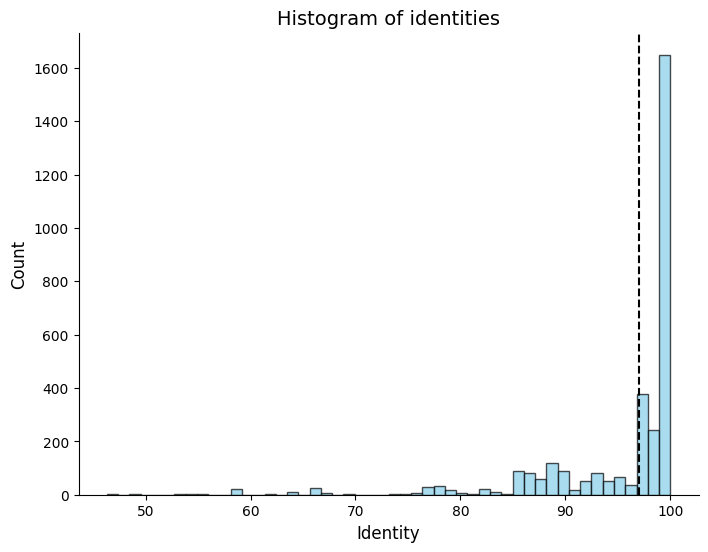

In [59]:
#bin list of identities by values 50 to 55, 55 to 60, 60 to 65, 65 to 70, 70 to 75, 75 to 80, 80 to 85, 85 to 90, 90 to 95, 95 to 100
# sort list by value
# list_of_all_identities.sort()

plt.figure(figsize=(8, 6))

# print(list_of_all_identities)
# make y scale log



plt.hist(list_of_all_identities, bins = 50, color = 'skyblue', edgecolor='black', alpha = 0.7)
# plt.yscale('log')
plt.xlabel('Identity', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Histogram of identities', fontsize = 14)

#remove frame and white space around plot
sns.despine()
# Add a black dashed vertical line at x = 97
plt.axvline(x=97, color='black', linestyle='--')

plt.savefig(f"{work_dir.replace('x_multicopy','y_multicopy')}/protein_extracted_longest/clusters_merged/identity_histogram.")
# plt.yscale('log')
# plt.savefig(f"{work_dir.replace('x_multicopy','y_multicopy')}/protein_extracted_longest/clusters_merged/identity_histogram_log.png")